<a href="https://colab.research.google.com/github/akhilps45/ICT-Assignments/blob/main/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent.
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

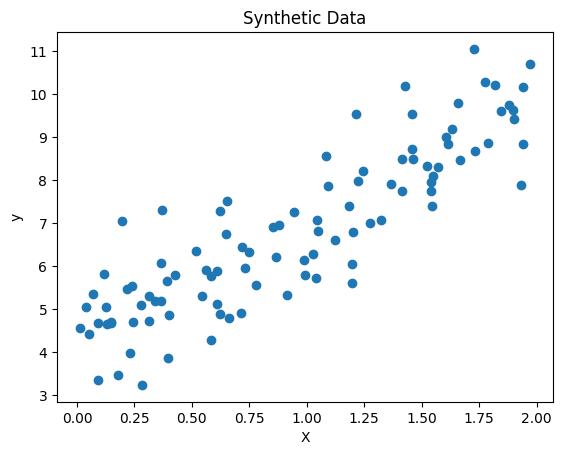

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()


## Do Train-Test Split (75%-25%)

In [ ]:
# Write your code here
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=42)
# random_state=42 is used to split the values by half.
# test_size=0.25 means 25% for test and 75 % for training

## Do the Linear Regression with Scikit-Learn Library

In [ ]:
# Write your code here
from sklearn.linear_model import LinearRegression #import LinearRegression model
from sklearn.metrics import r2_score,mean_absolute_percentage_error #import libraries to find R2 and MSE
model=LinearRegression() #creates an object for the model
model.fit(X_train,y_train) #train the features using the object-->X_train  for input features and y_train for actual output values
y_pred=model.predict(X_test) #predicts the model on data X_test
print("R2 Score:",r2_score(y_test,y_pred)) #output for R2 score
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred)) #output for MAPE score

R2 Score: 0.8310990846073661
MAPE: 0.08475682819153892


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [ ]:
# Write your code here
from sklearn.linear_model import Ridge,Lasso #import Ridge and Lasso model
import pandas as pd

ridge_model=Ridge(alpha=1.0) #creates a regression model with alpha =1.0
ridge_model.fit(X_train,y_train) #fits the model using training features and labels
y_pred_ridge=ridge_model.predict(X_test) #predicts the model using x_test

lasso_model=Lasso(alpha=0.1) #creates the lasso regression model
lasso_model.fit(X_train,y_train) #fits the model
y_pred_lasso=lasso_model.predict(X_test) #predicts the model using x_test

mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge) #computes the average percent error of ridge regression
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso) #computes the avg percent error for lasso regression
r2_ridge = r2_score(y_test, y_pred_ridge) #computes the r2 score for ridge
r2_lasso = r2_score(y_test, y_pred_lasso) #computes the r2 score for lasso

result_df= pd.DataFrame(columns=["Model","Metric","Value"])  #creating a table to evaluate metrics
result_df.loc[len(result_df)] = ['Ridge Regression',"MAPE",mape_ridge]
result_df.loc[len(result_df)] = ['Lasso Regression',"MAPE",mape_lasso]
result_df.loc[len(result_df)] = ['Ridge Regression',"R2",r2_ridge]
result_df.loc[len(result_df)] = ['Lasso Regression',"R2",r2_lasso]
result_df

Model Metric     Value
0  Ridge Regression   MAPE  0.082412
1  Lasso Regression   MAPE  0.082640
2  Ridge Regression     R2  0.825999
3  Lasso Regression     R2  0.809082

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:


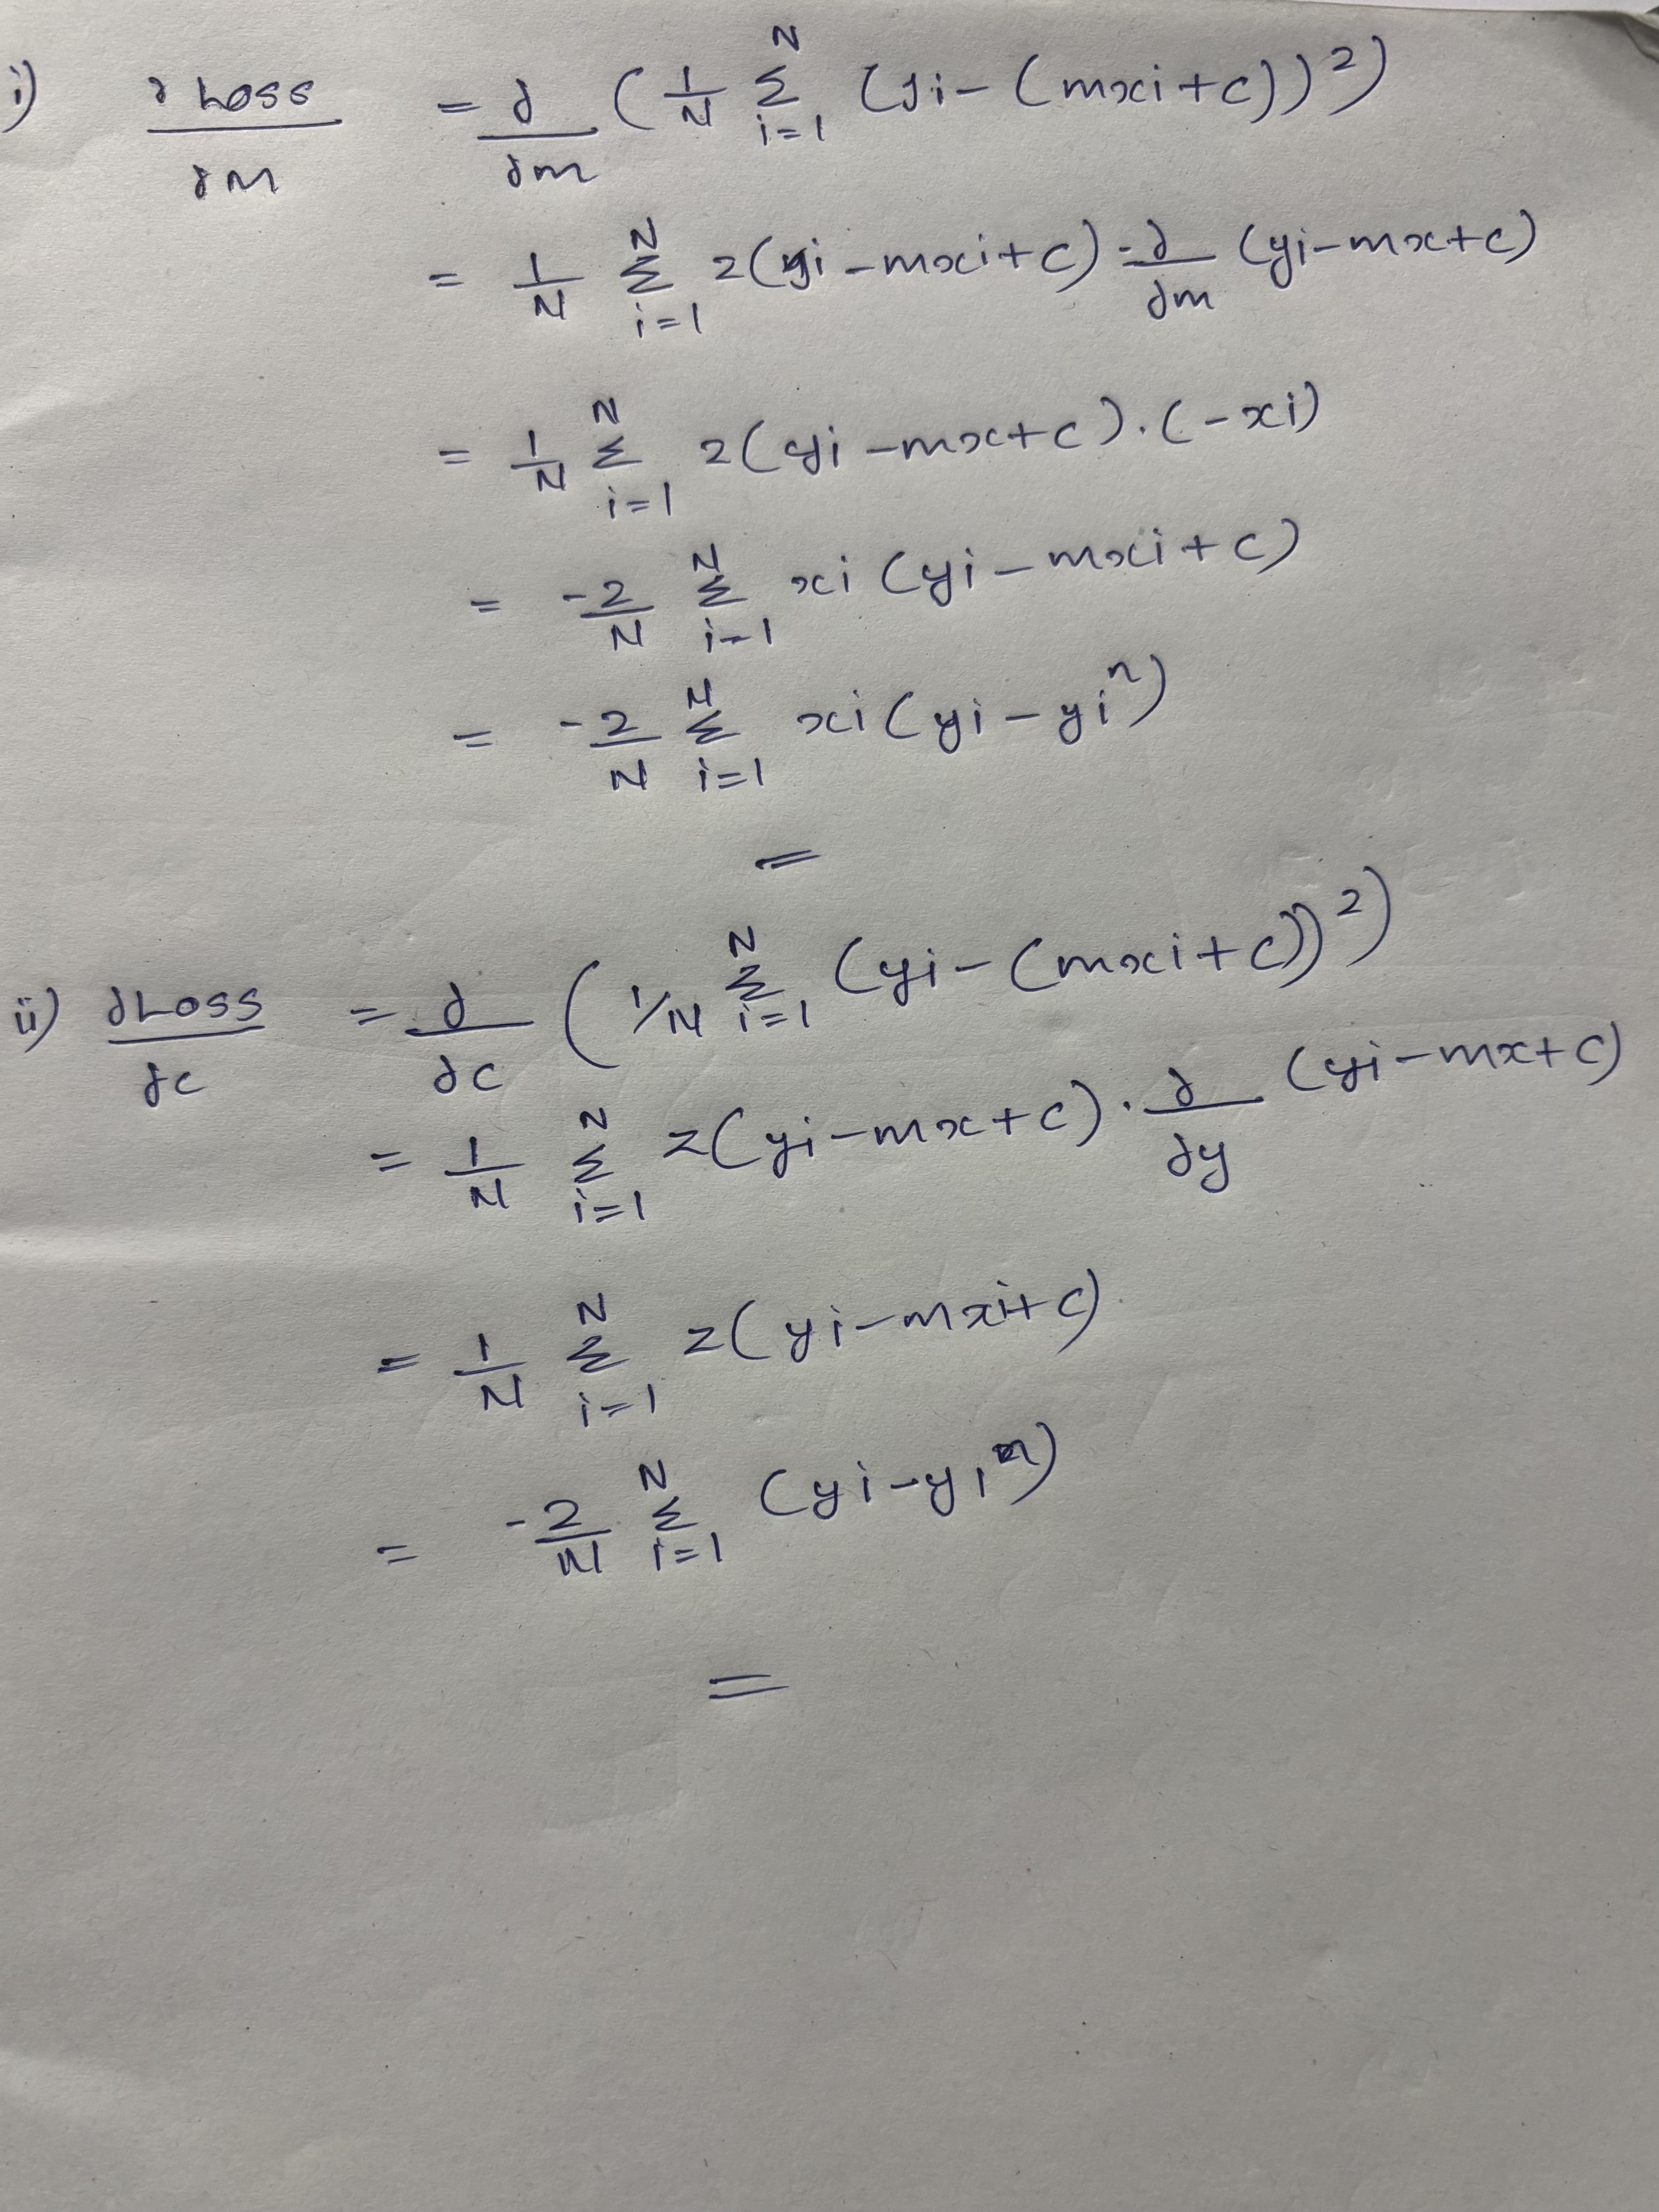

## 🧠 Custom Linear Regression Class

In [46]:
import numpy as np

class MyLinearRegression:
    def _init_(self):
        self.m = 0  # slope
        self.c = 0  # intercept
        self.coef_ = (self.m, self.c)
        self.losses_ = []

    def fit(self, X, y, lr=0.01, n_iters=1000):
        N = len(X)
        self.m = 0
        self.c = 0
        self.losses_ = []  # Reset losses

        for _ in range(n_iters):
            y_pred = self.m * X + self.c
            loss = np.mean((y - y_pred) ** 2)
            self.losses_.append(loss)

            dm = (-2 / N) * np.sum(X * (y - y_pred))
            dc = (-2 / N) * np.sum(y - y_pred)
            self.m -= lr * dm
            self.c -= lr * dc

        self.coef_ = (self.m, self.c)

    def predict(self, X):
        return self.m * X + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)

## 🔁 Train the Model and Visualize the Fit

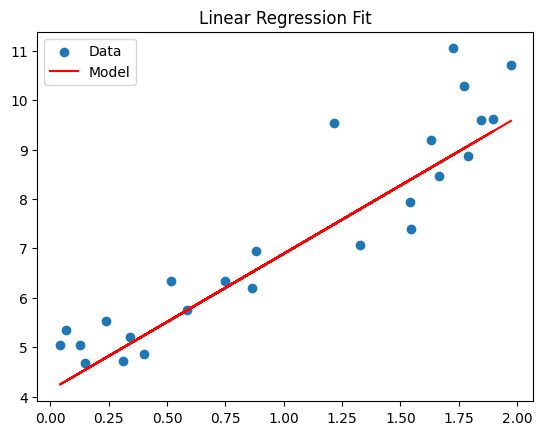

Learned coefficients (m, c): (np.float64(2.760287211333097), np.float64(4.131338540026423))


In [47]:

model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Predictions
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Print coefficients
print("Learned coefficients (m, c):", model.coef_)


## 📉 Plot the Loss Curve

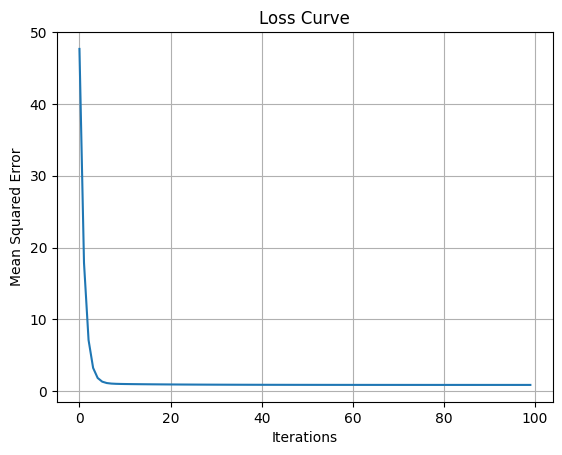

In [48]:
# Write your code here
import matplotlib.pyplot as plt

# Train model
model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Plot loss curve
plt.plot(model.losses_)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Loss Curve")
plt.grid(True)
plt.show()

## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [55]:
# Write your code here
class MyLinearRegressionSGD:
    def _init_(self):
        self.m = 0  # slope
        self.c = 0  # intercept
        self.coef_ = (self.m, self.c)
        self.losses_ = []

    def fit(self, X, y, lr=0.01, n_epochs=100):
        N = len(X)
        self.m = 0
        self.c = 0
        self.losses_ = []

        for epoch in range(n_epochs):
            # Shuffle data
            indices = np.random.permutation(N)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            epoch_loss = 0

            for i in range(N):
                xi = X_shuffled[i]
                yi = y_shuffled[i]
                y_pred = self.m * xi + self.c

                # Gradients for one sample
                error = yi - y_pred
                dm = -2 * xi * error
                dc = -2 * error

                # Update weights
                self.m -= lr * dm
                self.c -= lr * dc

                # Accumulate loss
                epoch_loss += error ** 2

            # Average loss for the epoch
            self.losses_.append(epoch_loss / N)

        self.coef_ = (self.m, self.c)

    def predict(self, X):
        return self.m * X + self.c

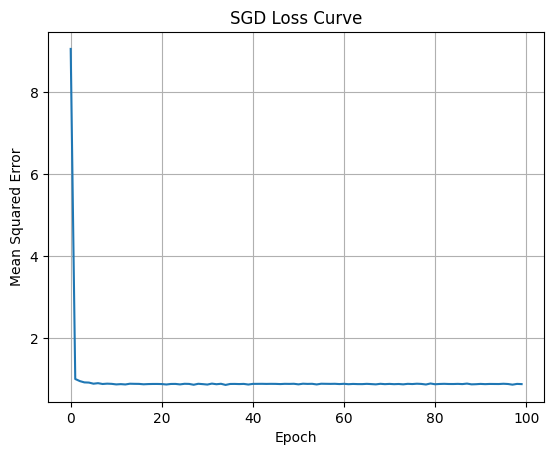

SGD Learned coefficients (m, c): (array([2.7137736]), array([4.12454844]))


In [56]:
# Plot loss curve while using Stochastic Gradient Descent
model_sgd = MyLinearRegressionSGD()
model_sgd.fit(X_train, y_train, lr=0.01, n_epochs=100)

# Predict
y_pred_sgd = model_sgd.predict(X_test)

# Plot loss curve
plt.plot(model_sgd.losses_)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("SGD Loss Curve")
plt.grid(True)
plt.show()

# Coefficients
print("SGD Learned coefficients (m, c):", model_sgd.coef_)

## Visualize the prediction result of Library version and Custom regression code created

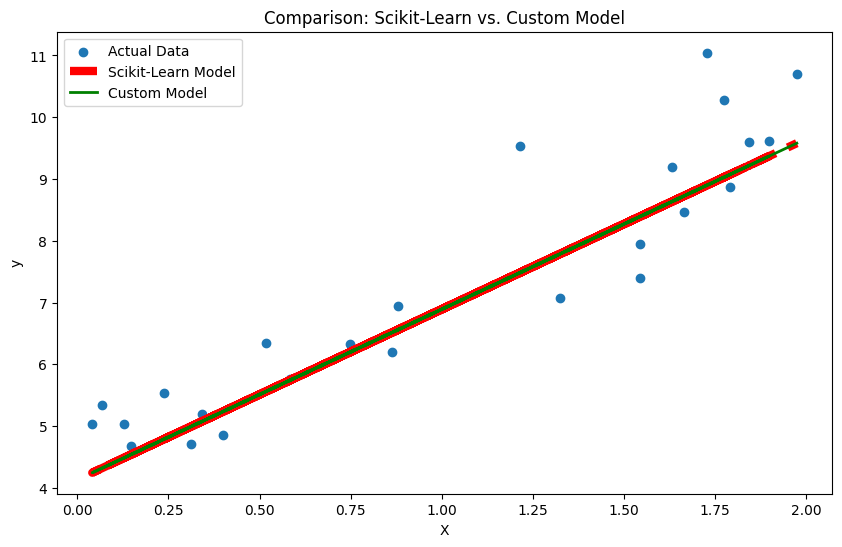

In [60]:
# Write your code here
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label="Actual Data")

plt.plot(X_test, y_pred, color='red', linewidth=6, linestyle='--', label="Scikit-Learn Model")

y_pred_custom = model.predict(X_test)
plt.plot(X_test, y_pred_custom, color='green', linewidth=2, label="Custom Model")

plt.title("Comparison: Scikit-Learn vs. Custom Model")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


## ✅ Checklist
- [ ] Did linear regression using scikit-learn API
- [ ] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [ ] Derived gradients using chain rule
- [ ] Implemented custom Linear Regression class
- [ ] Trained using gradient descent
- [ ] Visualized predictions and loss
- [ ] Implemented stochastic gradient descent (bonus)
- [ ] Visualized predictions and loss for stochastic gradient descent (bonus)
- [ ] Visualize the prediction result of Library version and custom version